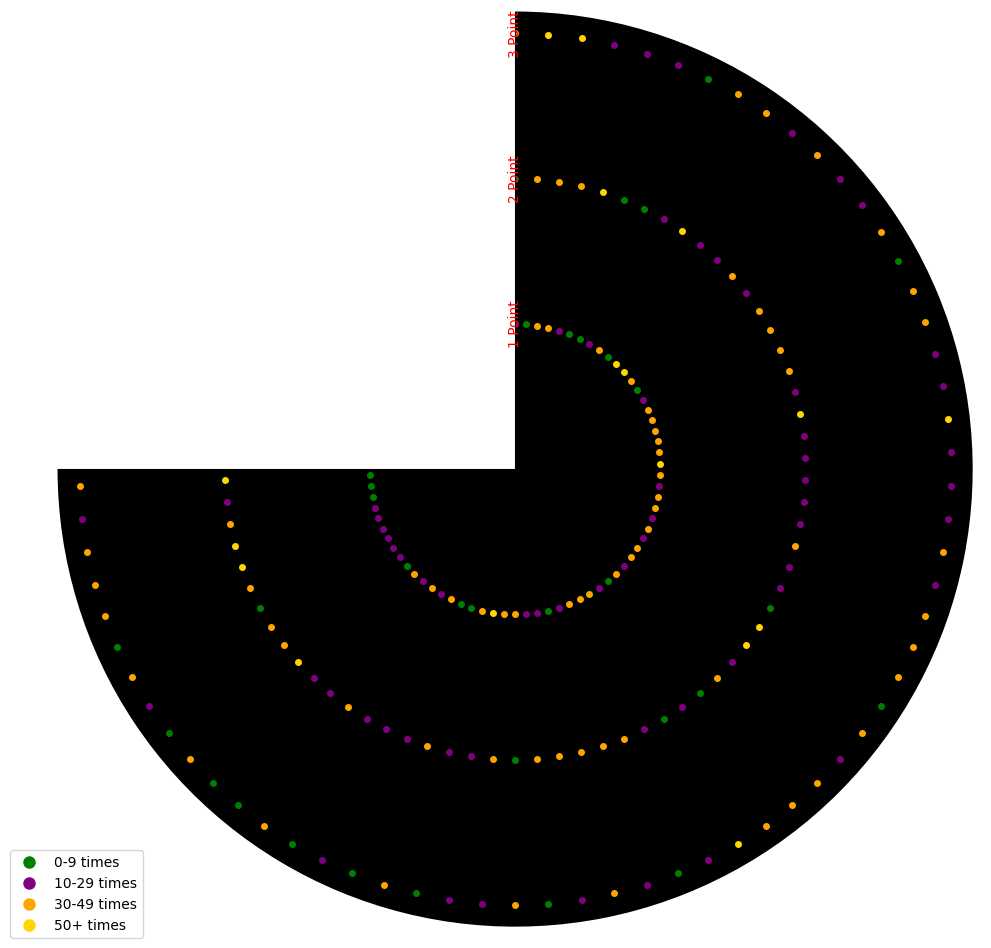

In [103]:
import matplotlib.pyplot as plt
import numpy as np

# Number of seasons
num_points = 3
# Number of games per season (assuming maximum 82 games)
games_per_season = 82

# Simulating points for each game in each season
# Here we're generating random points just as an example
points = np.random.randint(0, 55, size=(num_seasons, games_per_season))

# Map points to colors (e.g., high points get bright colors)
def get_color(point):
    if point >= 50:
        return 'gold'  # 50+ points
    elif point >= 30:
        return 'orange'  # 30-49 points
    elif point >= 10:
        return 'purple'  # 10-29 points
    else:
        return 'green'  # 0-9 points

# Create a polar subplot
fig, ax = plt.subplots(figsize=(12, 12), subplot_kw=dict(polar=True))
ax.set_facecolor('black')  # Black background

#blank the center out
ax.plot(0,0,'o',color='black',markersize=1)


# Plot each point on the polar subplot and add a label on the start of each season ring
for season in range(num_points):
    # Store the label's position for later use
    label_pos_theta = 1.5 * np.pi  # At 90 degrees on the left side of the plot
    label_pos_r = season + 1
    label_text = f'{season + 1} Point'
    
    # Plot each point on the polar subplot
    for game in range(games_per_season):
        # Adjust angle for each game to fit the new theta range
        theta = 2 * np.pi * (1.5 - (game / games_per_season)) + np.pi/2  # Adjusting to start from 270 and wrap to 180 degrees clockwise
        r = season + 1  # Radius is determined by the season
        color = get_color(points[season, game])
        ax.plot(theta, r, 'o', color=color, markersize=4)
        
    # Add the season label at the calculated position
    ax.text(label_pos_theta, label_pos_r, label_text, color='red', size='medium', horizontalalignment='center', verticalalignment='center', rotation=90)



# Customizing the plot to hide grid, ticks, and labels
ax.grid(False)
ax.set_theta_direction(-1)
ax.set_xticks([])
ax.set_yticks([])
ax.set_thetamin(270)
ax.set_thetamax(540)
ax.spines['polar'].set_visible(False)

#legend
legend_elements = [
    plt.Line2D([0], [0], marker='o', color='w', label='0-9 times', markersize=10, markerfacecolor='green'),
    plt.Line2D([0], [0], marker='o', color='w', label='10-29 times', markersize=10, markerfacecolor='purple'),
    plt.Line2D([0], [0], marker='o', color='w', label='30-49 times', markersize=10, markerfacecolor='orange'),
    plt.Line2D([0], [0], marker='o', color='w', label='50+ times', markersize=10, markerfacecolor='gold'),
]
ax.legend(handles=legend_elements, loc='upper right', bbox_to_anchor=(0.1, 0.1))

plt.savefig('circle.jpg')
plt.show()